In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from scipy.stats import norm

from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

%matplotlib inline

In [1]:
sns.set_style(
    'white', 
    {
        'axes.spines.right': False,
        'axes.spines.top': False
    }
)

sns.set(rc={'figure.figsize':(11.7,8.27)})

NameError: name 'sns' is not defined

## Null Hypothesis and Testing
* the null hypothesis ($H_0$) proposes that no significant difference exists in a set of given observations
    * **null**: the given sample means are equal
    * **alternative**: the given sample means are not equal
* in order to reject a null hypothesis, a *test statistic* must be calculated and compared with a *critical value*. if the test statistic falls in the critical region, the null hypothesis is rejected.
* critical values are boundries of the critical region

## Critical Value
* a point of points on the scale of the test statistic beyond which we reject the null hypothesis. they are derived from the *level of significance* ($\alpha$) of the test
* critical values can tell us the probability of two sample means belinging to the same distribution. the higher the critical value means lower the probability of two samples belining to the same distribution.
* the standard critical value for a two-tailed test is 1.96, which is based on the fact that 95% of the area of a normal distribution is within 1.96 standard deviations from the mean.

In [6]:
x = np.linspace(-5,5,10000)
mu = 0
sigma = 1

y = (1 / (np.sqrt(2 * np.pi * np.power(sigma, 2)))) * \
    (np.power(np.e, -(np.power((x - mu), 2) / (2 * np.power(sigma, 2)))))

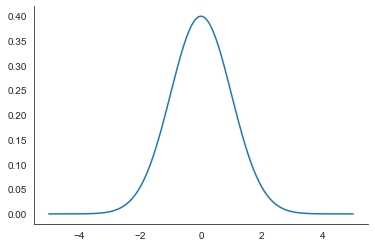

In [11]:
plt.plot(x,y)
plt.show()

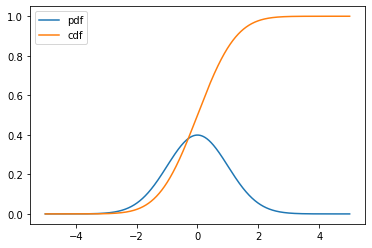

In [9]:
y_pdf = stats.norm.pdf(x, mu, sigma) # the normal pdf
y_cdf = stats.norm.cdf(x, mu, sigma) # the normal cdf

plt.plot(x, y_pdf, label='pdf')
plt.plot(x, y_cdf, label='cdf')
plt.legend()
plt.show()

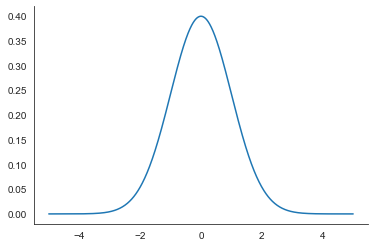

In [26]:
x = np.linspace(-5,5,1000)

plt.plot(x,norm.pdf(x,mu,sigma))

plt.show()

In [27]:
# probability that x < 0
norm.cdf(0,mu,sigma)

0.5

In [31]:
# normal emperical rule
# 68% within 1 std
print(norm.cdf(1,mu,sigma) - norm.cdf(-1,mu,sigma))

# 95%
print(norm.cdf(2,mu,sigma) - norm.cdf(-2,mu,sigma))

# 99%
print(norm.cdf(3,mu,sigma) - norm.cdf(-3,mu,sigma))

0.6826894921370859
0.9544997361036416
0.9973002039367398


## Z-Test
In a z-test, the sample is assumed to be normally distributed. A z-score is calculated with population parameters such as “population mean” and “population standard deviation” and is used to validate a hypothesis that the sample drawn belongs to the same population.
Null: Sample mean is same as the population mean
Alternate: Sample mean is not same as the population mean
The statistics used for this hypothesis testing is called z-statistic, the score for which is calculated as
$$z = \frac{x — \mu}{\frac{\sigma}{\sqrt{n}}}$$
where:
* $x$= sample mean
* $\mu$ = population mean
* $\frac{\sigma}{\sqrt{n}}$ = population standard deviation

If the test statistic is lower than the critical value, accept the hypothesis or else reject the hypothesis

## T-Test
A t-test is used to compare the mean of two given samples. Like a z-test, a t-test also assumes a normal distribution of the sample. A t-test is used when the population parameters (mean and standard deviation) are not known.

There are three versions of t-test:
1. Independent samples t-test which compares mean for two groups
2. Paired sample t-test which compares means from the same group at different times
3. One sample t-test which tests the mean of a single group against a known mean.

The statistic for this hypothesis testing is called t-statistic, the score for which is calculated as
$$
t = \frac{x_1 - x_2}{\frac{\sigma}{\sqrt{n_1}} + \frac{\sigma}{\sqrt{n_2}}}
$$

where:
* $x_1$ = mean of sample 1
* $x_2$ = mean of sample 2
* $n_1$ = size of sample 1
* $n_2$ = size of sample 2

In [2]:
import numpy as np
from scipy.stats import ttest_1samp

In [6]:
# one sample t-test
# test to see if the average age is 30 or not
ages = [32,34,29,29,22,39,38,37,38,36,30,26,22,22]

mean_age = np.mean(ages) # mean ages

# run t-test, extract p-value
tset, pval = ttest_1samp(ages, 30) 

print('p-values: ', np.round(pval,4))

# compare p-value to critical statistic
if pval < 0.05:
    print('reject the null hypothesis')
else:
    print('accept the null hypothesis')

p-values:  0.5605
0.5973799001456603
accept the null hypothesis


In [ ]:
# two sampled test


## ANOVA
ANOVA, also known as analysis of variance, is used to compare multiple (three or more) samples with a single test. There are 2 major flavors of ANOVA
1. One-way ANOVA: It is used to compare the difference between the three or more samples/groups of a single independent variable.
2. MANOVA: MANOVA allows us to test the effect of one or more independent variable on two or more dependent variables. In addition, MANOVA can also detect the difference in co-relation between dependent variables given the groups of independent variables.

The hypothesis being tested in ANOVA is:
* Null: All pairs of samples are same i.e. all sample means are equal
* Alternate: At least one pair of samples is significantly different

The statistics used to measure the significance, in this case, is called F-statistics. The F value is calculated using the formula:

$$F = \frac{\frac{SSE_1 — SSE_2}{m}} {\frac{ SSE2}{n-k}}$$

where
* $SSE$ = residual sum of squares
* $m$ = number of restrictions
* $k$ = number of independent variables



## Chi-Square Test

Chi-square test is used to compare categorical variables. There are two type of chi-square test

1. Goodness of fit test, which determines if a sample matches the population.
2. A chi-square fit test for two independent variables is used to compare two variables in a contingency table to check if the data fits.
    * A small chi-square value means that data fits
    * A high chi-square value means that data doesn’t fit.
    
The hypothesis being tested for chi-square is:

* Null: Variable A and Variable B are independent
* Alternate: Variable A and Variable B are not independent.

The statistic used to measure significance, in this case, is called chi-square statistic. The formula used for calculating the statistic is:

$$
Q = \sum _{i=1}^{k}X_{i}^2
$$

## Examples

Q: does drinking tea lead to weight loss?

In [15]:
d = {
    'tea':[12,12.3,14.1,6.2,6.9,5,16.2,3.2,4.8,5.9,15,12,11.1],
    'water':[11.2,15.1,16,7.2,3.1,1.2,5.2,4.1,3.1,11.6,2.1,6.5,9.1]
}

df = pd.DataFrame(d)
df

,tea,water
0,12.0,11.2
1,12.3,15.1
2,14.1,16.0
3,6.2,7.2
4,6.9,3.1
5,5.0,1.2
6,16.2,5.2
7,3.2,4.1
8,4.8,3.1
9,5.9,11.6


In [25]:
# calculate mean and variance for each column
summary = pd.DataFrame()
summary['mean'] = df.mean()
summary['variance'] = df.var()
summary['n'] = df.count()

summary.T

,tea,water
mean,9.592308,7.346154
variance,19.310769,24.022692
n,13.000000,13.000000


In [26]:
t, p = stats.ttest_ind(df['tea'],df['water'],equal_var=False)
print(t,p)

1.2302673092447416 0.23065930293740272


In [27]:
# paired samples t-test
d = {
    'subject':[1,2,3,4,5,6,7,8,9,10,11],
    'score_1':[3,3,3,12,15,16,17,19,23,24,32],
    'score_2':[20,13,13,20,29,32,23,20,25,15,30]
}

df = pd.DataFrame(d)
df

,subject,score_1,score_2
0,1,3,20
1,2,3,13
2,3,3,13
3,4,12,20
4,5,15,29
5,6,16,32
6,7,17,23
7,8,19,20
8,9,23,25
9,10,24,15


In [29]:
# subtract Y scores from X scores
df['X-Y'] = df['score_1'] - df['score_2']
df

,subject,score_1,score_2,X-Y
0,1,3,20,-17
1,2,3,13,-10
2,3,3,13,-10
3,4,12,20,-8
4,5,15,29,-14
5,6,16,32,-16
6,7,17,23,-6
7,8,19,20,-1
8,9,23,25,-2
9,10,24,15,9


In [30]:
# sum up X-Y
df['X-Y'].sum()

-73

In [32]:
# square differences from step 1
df['(X-Y)^2'] = df['X-Y'] ** 2
df

,subject,score_1,score_2,X-Y,(X-Y)^2
0,1,3,20,-17,289
1,2,3,13,-10,100
2,3,3,13,-10,100
3,4,12,20,-8,64
4,5,15,29,-14,196
5,6,16,32,-16,256
6,7,17,23,-6,36
7,8,19,20,-1,1
8,9,23,25,-2,4
9,10,24,15,9,81


In [33]:
#
df['(X-Y)^2'].sum()

1131

In [37]:
t,p = stats.ttest_rel(df['score_1'],df['score_2'])
print(t,p)

-2.737328922288368 0.02092847795148222


In [38]:
(df['score_1'] - df['score_2']) / df['(X-Y)^2)']

KeyError: '(X-Y)^2)'